# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

## Context

![img](../data/diamonds.jpg)

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

In this lab we will first explore our dataset to better understand the data we have and then try to determine which characteristics of a diamond are more likely to influence its price.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them in the following week.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
#your code here

In [3]:
#Solution
diamonds = pd.read_csv('diamonds.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

# 1. Taking the first look on the data.
Let's see how the data looks like by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [4]:
#your code here

In [5]:
#Solution
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and the values that each one takes.

**What do you see? Do some comments about the values you see in each column, comparing with the codebook. Is that waht you expected?**

In [6]:
#your code here

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice on our infrastracture.

**Check the shape of the data**

In [7]:
#your code here

In [8]:
#Solution
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamonds experts, so we will create a new column with a new scale better understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [9]:
#your code here

In [10]:
#Solution
clarity = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
for i, j in clarity.items():
    diamonds.clarity.replace(i, j, inplace=True)

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [11]:
#your code here

In [12]:
#Solution
color = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
for i, j in color.items():
    diamonds.color.replace(i, j, inplace=True)

With the `info` method, we can see the features of the dataset, the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment what you see**

In [13]:
#your code here

In [14]:
#Solution
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null int64
clarity    53940 non-null int64
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 4.1+ MB


#### Solution
By checking the shape of our dataset, we can see the total amount of observations and check if they match with the ones provided by `info`. If one of them does not match, it means that we do have a `NaN` value in some observation. As we can see we don't have missing values, or at least in the form of np.nan

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is the expected. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation as format the date the way we like.+

Also, changing the type for the one we need, is useful to find a lot of issues in our data.

**Check the types of each column and comment if it matches with the expected**

In [15]:
#your code here

In [16]:
#Solution
diamonds.dtypes

carat      float64
cut         object
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### Solution
Luckily everything is ok.

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics and take further steps, if needed.

**Use the `describe` method and comment what you see**

In [17]:
#your code and comments here

In [18]:
#Solution
diamonds.describe()

carat         color       clarity         depth         table  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      3.405803      3.051020     61.749405     57.457184   
std        0.474011      1.701105      1.647136      1.432621      2.234491   
min        0.200000      0.000000      0.000000     43.000000     43.000000   
25%        0.400000      2.000000      2.000000     61.000000     56.000000   
50%        0.700000      3.000000      3.000000     61.800000     57.000000   
75%        1.040000      5.000000      4.000000     62.500000     59.000000   
max        5.010000      6.000000      7.000000     79.000000     95.000000   

              price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  
mean    3932.799722      5.731157      5.734526      3.538734  
std     3989.439738      1.121761      1.142135      0.705699  
min      326.000000      0.000000      0.000000      0.000000  
25%      950.000000      4.710000      4.720000      2.910000  
50%     2401.000000      5.700000      5.710000      3.530000  
75%     5324.250000      6.540000      6.540000      4.040000  
max    18823.000000     10.740000     58.900000     31.800000

For example, you have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0 which, considering that we're talking about a physical object, is impossible!

We will proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we're missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [19]:
#your code here

In [20]:
# Solution
diamonds.query('x== 0 or z == 0 or y == 0')

carat        cut  color  clarity  depth  table  price     x     y    z
2207    1.00    Premium      3        1   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium      2        0   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium      3        1   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium      4        1   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good      3        0   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal      4        1   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good      2        3   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal      3        3   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair      3        4   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium      2        1   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal      3        3   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium      1        2   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium      6        6   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium      2        2   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium      2        1   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium      2        3   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good      3        1   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good      4        1   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good      4        1   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium      3        0   60.4   59.0   2383  6.71  6.67  0.0

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just a 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them, but we want to do the best job we can so we will keep everything we can. 

So for that 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [21]:
#your code here

In [22]:
#Solution
def calculate_z(row):
    """
    Input: pd.Series
    Output: Int
    
    This function takes depth, x and y and calculates the value of z.
    """
    x = row['x']
    y = row['y']
    depth = row['depth'] / 100

    return round(np.mean([x,y]) * depth, 2) 

**Apply it just to the rows with wrong values**

In [23]:
#Solution
rows_with_zero = diamonds.query('x== 0 or z == 0 or y == 0').copy()
rows_with_zero['z'] = rows_with_zero.apply(calculate_z, axis=1)
diamonds.update(rows_with_zero)

If we leave the other 8 values as they are it'd negatively affect our analysis and therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during the whole process going from measuring those values to storing them in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [24]:
#your code here

In [25]:
#Solution
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0, np.NaN)

----
# Bonus: let's check the new z values
Since with data we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [26]:
#your code here

In [27]:
#Solution
def validate_z(row):
    """
    Input: pd.Series
    Output: Float, Bool
    
    # Calculate the value of depth using the formula depth = z / mean(x, y). Also compare if the real depth
    # and the value calculated by us is the same (to do this we're rounding to the closest integer number).
    """
    c_depth = round((row.z / np.mean([row.x, row.y])) * 100, 1) 
    string = f'Real depth: {row.depth}. Value to validate: {c_depth}'
    return (string, round(c_depth, 0) == round(row.depth, 0))

rows_with_zero.loc[:, 'z'] = rows_with_zero.apply(calculate_z, axis=1).copy()
rows_with_zero[['x','y','z']] = rows_with_zero[['x','y','z']].replace(0, np.NaN).copy()
rows_with_zero = rows_with_zero.dropna()
depth = rows_with_zero.apply(validate_z, axis=1)
depth

2207     (Real depth: 59.1. Value to validate: 59.1, True)
2314     (Real depth: 58.1. Value to validate: 58.1, True)
4791     (Real depth: 63.0. Value to validate: 63.1, True)
5471     (Real depth: 59.2. Value to validate: 59.2, True)
10167    (Real depth: 64.0. Value to validate: 64.0, True)
13601    (Real depth: 59.2. Value to validate: 59.2, True)
24394    (Real depth: 59.4. Value to validate: 59.4, True)
26123    (Real depth: 61.3. Value to validate: 61.3, True)
27112    (Real depth: 61.2. Value to validate: 61.2, True)
27503    (Real depth: 62.7. Value to validate: 62.7, True)
27739    (Real depth: 63.8. Value to validate: 63.8, True)
51506    (Real depth: 60.4. Value to validate: 60.4, True)
dtype: object

We see that we have done all the calculations the right way.

--------------------

Let's check the data again with the `describe()` method.

In [28]:
diamonds.describe()

carat         color       clarity         depth         table  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      3.405803      3.051020     61.749405     57.457184   
std        0.474011      1.701105      1.647136      1.432621      2.234491   
min        0.200000      0.000000      0.000000     43.000000     43.000000   
25%        0.400000      2.000000      2.000000     61.000000     56.000000   
50%        0.700000      3.000000      3.000000     61.800000     57.000000   
75%        1.040000      5.000000      4.000000     62.500000     59.000000   
max        5.010000      6.000000      7.000000     79.000000     95.000000   

              price             x             y             z  
count  53940.000000  53932.000000  53933.000000  53933.000000  
mean    3932.799722      5.732007      5.735270      3.540238  
std     3989.439738      1.119670      1.140339      0.702690  
min      326.000000      3.730000      3.680000      1.070000  
25%      950.000000      4.710000      4.720000      2.910000  
50%     2401.000000      5.700000      5.710000      3.530000  
75%     5324.250000      6.540000      6.540000      4.040000  
max    18823.000000     10.740000     58.900000     31.800000

Good! The minimum value for x, y and z is now a positive number, as it should be for the physical measures of an object.

We finish by checking for NaN values in the dataset. Since we introduced them ourselves with the replace we just applied we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with the actual analysis.

**Check how many outliers do you have and comment what you would do with those values**

In [29]:
#your code here

In [30]:
#Solution
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          8
y          7
z          7
dtype: int64

#### Solution
Since we only have 8 null values over a total of 54000 observations and we can't have a way of replacing the missing values, we can safely drop the related rows since they represent a minimal part of our dataset. There could be cases where you have some columns that have a huge number of NaNs. In those cases it is always better to try and understand the reason for that before dropping the rows, because doing that may mean that you are removing a relevant portion of your data.

In [31]:
#Solution
diamonds = diamonds.dropna()

# 3. Checking the outliers
Now we're going to revisit the summary table and check for outliers.

**Use the `describe` method again and comment the statistics, after that look if you have any outlier** 

In [32]:
#your code here

In [33]:
#your comments here

In [34]:
#Solution
diamonds.describe()

carat         color       clarity         depth         table  \
count  53932.000000  53932.000000  53932.000000  53932.000000  53932.000000   
mean       0.797879      3.405789      3.051101     61.749336     57.457029   
std        0.473986      1.701165      1.647109      1.432514      2.234064   
min        0.200000      0.000000      0.000000     43.000000     43.000000   
25%        0.400000      2.000000      2.000000     61.000000     56.000000   
50%        0.700000      3.000000      3.000000     61.800000     57.000000   
75%        1.040000      5.000000      4.000000     62.500000     59.000000   
max        5.010000      6.000000      7.000000     79.000000     95.000000   

              price             x             y             z  
count  53932.000000  53932.000000  53932.000000  53932.000000  
mean    3932.136079      5.732007      5.735254      3.540266  
std     3988.734835      1.119670      1.140343      0.702667  
min      326.000000      3.730000      3.680000      1.070000  
25%      949.750000      4.710000      4.720000      2.910000  
50%     2401.000000      5.700000      5.710000      3.530000  
75%     5324.000000      6.540000      6.540000      4.040000  
max    18823.000000     10.740000     58.900000     31.800000

#### Solution
We can clearly see that the `y` and `z` columns have some weird values if we look at the 75th percentile. 75% of the values are under 6.54 for `y` and 4.04 for `z`, but then the max values are 58.9 for `y` and 31.8 for `z`. Price also has a similar behaviour, but for now let's focus on these 2 variables.

We're going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [35]:
#your code here

In [36]:
#Solution
quantile75 = diamonds.y.quantile(0.75)
diamonds[diamonds.y > quantile75]

carat        cut  color  clarity  depth  table    price     x      y  \
172     1.17  Very Good    0.0      0.0   60.2   61.0   2774.0  6.83   6.90   
284     1.00    Premium    1.0      1.0   58.2   60.0   2795.0  6.61   6.55   
376     1.20       Fair    4.0      0.0   64.6   56.0   2809.0  6.73   6.66   
423     0.99       Fair    0.0      2.0   55.0   61.0   2812.0  6.72   6.67   
443     0.96       Fair    5.0      1.0   53.1   63.0   2815.0  6.73   6.65   
525     1.17    Premium    0.0      0.0   60.2   61.0   2825.0  6.90   6.83   
634     1.00    Premium    4.0      0.0   58.9   60.0   2841.0  6.60   6.55   
659     1.27    Premium    2.0      1.0   59.3   61.0   2845.0  7.12   7.05   
682     1.20  Very Good    2.0      0.0   63.1   60.0   2850.0  6.75   6.67   
701     1.12    Premium    2.0      0.0   59.1   61.0   2854.0  6.78   6.75   
712     0.98       Fair    5.0      1.0   53.3   67.0   2855.0  6.82   6.74   
713     1.02       Fair    1.0      2.0   53.0   63.0   2856.0  6.84   6.77   
800     1.22    Premium    5.0      0.0   60.9   57.0   2862.0  6.93   6.88   
967     1.19       Fair    2.0      0.0   65.1   59.0   2892.0  6.62   6.55   
999     1.12    Premium    0.0      1.0   60.6   59.0   2898.0  6.68   6.61   
1088    1.05    Premium    1.0      1.0   58.3   57.0   2911.0  6.72   6.67   
1163    1.20    Premium    1.0      0.0   60.5   58.0   2925.0  6.90   6.79   
1199    1.17       Fair    1.0      0.0   65.4   62.0   2935.0  6.68   6.57   
1224    1.24  Very Good    0.0      0.0   61.9   55.0   2940.0  6.85   6.92   
1228    1.00       Good    2.0      0.0   57.6   61.0   2940.0  6.67   6.60   
1362    1.50       Fair    2.0      0.0   65.6   54.0   2964.0  7.26   7.09   
1510    1.24    Premium    0.0      0.0   61.9   55.0   2994.0  6.92   6.85   
1598    1.20       Fair    1.0      0.0   62.2   66.0   3011.0  6.77   6.70   
1608    1.00       Fair    5.0      1.0   55.4   62.0   3011.0  6.63   6.59   
1639    1.12    Premium    3.0      0.0   60.3   60.0   3017.0  6.75   6.69   
1642    1.12  Very Good    3.0      0.0   61.2   63.0   3017.0  6.68   6.59   
1644    1.03  Very Good    3.0      0.0   60.8   57.0   3018.0  6.51   6.55   
1763    1.14      Ideal    0.0      2.0   60.2   57.0   3045.0  6.81   6.71   
1974    1.20    Premium    3.0      0.0   60.3   58.0   3091.0  6.82   6.77   
1997    1.29       Good    1.0      0.0   64.2   54.0   3098.0  6.93   6.83   
...      ...        ...    ...      ...    ...    ...      ...   ...    ...   
27741   2.15      Ideal    3.0      1.0   62.6   54.0  18791.0  8.29   8.35   
27742   2.04    Premium    2.0      2.0   58.1   60.0  18795.0  8.37   8.28   
27743   2.00    Premium    1.0      4.0   60.8   59.0  18795.0  8.13   8.02   
27744   2.29    Premium    1.0      2.0   61.8   59.0  18797.0  8.52   8.45   
27745   2.00  Very Good    2.0      2.0   62.8   57.0  18803.0  7.95   8.00   
27746   2.07      Ideal    3.0      1.0   62.5   55.0  18804.0  8.20   8.13   
27747   1.51      Ideal    3.0      7.0   61.7   55.0  18806.0  7.37   7.41   
27748   2.00  Very Good    3.0      2.0   63.5   56.0  18818.0  7.90   7.97   
27749   2.29    Premium    1.0      3.0   60.8   60.0  18823.0  8.50   8.47   
49189   0.51      Ideal    5.0      4.0   61.8   55.0   2075.0  5.15  31.80   
49217   1.06  Very Good    3.0      0.0   60.7   63.0   2080.0  6.59   6.56   
50174   1.03       Good    0.0      0.0   58.2   64.0   2220.0  6.64   6.69   
50425   1.07    Premium    1.0      0.0   59.8   59.0   2260.0  6.68   6.62   
51020   1.14       Good    3.0      0.0   63.7   56.0   2327.0  6.63   6.55   
51139   1.01       Fair    1.0      0.0   56.1   63.0   2342.0  6.70   6.65   
51150   1.02       Good    3.0      0.0   57.4   59.0   2344.0  6.64   6.60   
51292   1.20    Premium    4.0      0.0   62.9   58.0   2360.0  6.86   6.79   
51390   1.16    Premium    2.0      0.0   61.7   62.0   2368.0  6.68   6.64   
51463   1.20       Fair    1.0      0.0   65.1   55.0   2

In [37]:
#Solution
quantile75 = diamonds.z.quantile(0.75)
diamonds[diamonds.z > quantile75]

carat        cut  color  clarity  depth  table   price     x     y  \
97      0.96       Fair    4.0      1.0   66.3   62.0  2759.0  6.27  5.95   
172     1.17  Very Good    0.0      0.0   60.2   61.0  2774.0  6.83  6.90   
204     0.98       Fair    2.0      1.0   67.9   60.0  2777.0  6.05  5.97   
247     1.05  Very Good    0.0      1.0   63.2   56.0  2789.0  6.49  6.45   
255     1.05       Fair    0.0      1.0   65.8   59.0  2789.0  6.41  6.27   
298     1.01       Fair    5.0      1.0   67.4   60.0  2797.0  6.19  6.05   
369     1.00       Fair    3.0      0.0   66.4   59.0  2808.0  6.16  6.09   
376     1.20       Fair    4.0      0.0   64.6   56.0  2809.0  6.73  6.66   
385     0.99       Fair    1.0      1.0   68.1   56.0  2811.0  6.21  6.06   
472     1.00       Fair    2.0      1.0   65.3   62.0  2818.0  6.34  6.12   
525     1.17    Premium    0.0      0.0   60.2   61.0  2825.0  6.90  6.83   
635     0.95       Fair    3.0      2.0   66.7   56.0  2841.0  6.16  6.03   
659     1.27    Premium    2.0      1.0   59.3   61.0  2845.0  7.12  7.05   
663     1.01       Fair    2.0      1.0   65.4   59.0  2846.0  6.30  6.26   
682     1.20  Very Good    2.0      0.0   63.1   60.0  2850.0  6.75  6.67   
719     1.00       Fair    1.0      2.0   67.9   62.0  2856.0  6.19  6.03   
800     1.22    Premium    5.0      0.0   60.9   57.0  2862.0  6.93  6.88   
801     1.01       Fair    5.0      1.0   67.6   57.0  2862.0  6.21  6.11   
839     0.96       Fair    4.0      1.0   68.2   61.0  2867.0  6.07  5.88   
895     1.00       Fair    2.0      1.0   67.7   60.0  2875.0  6.11  5.98   
897     1.00       Fair    0.0      4.0   65.5   55.0  2875.0  6.30  6.25   
899     1.00       Fair    2.0      1.0   69.5   55.0  2875.0  6.17  6.10   
934     1.03       Fair    1.0      1.0   65.3   55.0  2884.0  6.32  6.27   
967     1.19       Fair    2.0      0.0   65.1   59.0  2892.0  6.62  6.55   
1096    1.00       Fair    2.0      1.0   65.2   54.0  2912.0  6.30  6.22   
1097    1.00       Fair    1.0      2.0   66.0   56.0  2912.0  6.31  6.24   
1098    1.00       Fair    2.0      1.0   67.0   55.0  2912.0  6.25  6.12   
1163    1.20    Premium    1.0      0.0   60.5   58.0  2925.0  6.90  6.79   
1199    1.17       Fair    1.0      0.0   65.4   62.0  2935.0  6.68  6.57   
1224    1.24  Very Good    0.0      0.0   61.9   55.0  2940.0  6.85  6.92   
...      ...        ...    ...      ...    ...    ...     ...   ...   ...   
51007   1.00       Fair    3.0      1.0   70.2   58.0  2326.0  6.00  5.73   
51020   1.14       Good    3.0      0.0   63.7   56.0  2327.0  6.63  6.55   
51101   1.17       Fair    1.0      0.0   64.5   59.0  2336.0  6.67  6.47   
51117   0.97       Fair    4.0      1.0   67.2   61.0  2338.0  6.09  6.00   
51258   0.97       Fair    1.0      0.0   67.3   55.0  2357.0  6.08  6.02   
51292   1.20    Premium    4.0      0.0   62.9   58.0  2360.0  6.86  6.79   
51390   1.16    Premium    2.0      0.0   61.7   62.0  2368.0  6.68  6.64   
51445   1.07       Fair    3.0      0.0   64.8   56.0  2375.0  6.53  6.43   
51462   1.20       Fair    1.0      0.0   66.7   57.0  2376.0  6.57  6.05   
51463   1.20       Fair    1.0      0.0   65.1   55.0  2376.0  6.65  6.59   
51464   1.20       Fair    3.0      0.0   66.6   57.0  2376.0  6.57  6.50   
51626   1.21       Fair    1.0      0.0   65.0   58.0  2396.0  6.65  6.59   
51928   0.96       Fair    3.0      1.0   72.2   56.0  2438.0  6.01  5.81   
52422   1.30       Fair    2.0      0.0   64.4   57.0  2512.0  6.93  6.86   
52470   0.96       Fair    0.0      2.0   67.3   56.0  2517.0  6.06  6.01   
52538   1.00       Fair    2.0      1.0   67.8   53.0  2530.0  6.08  6.02   
52589   0.96       Fair    3.0      1.0   66.8   61.0  2539.0  6.15  6.04   
52805   1.30       Fair    5.0      0.0   66.5   58.0  2571.0  6.79  6.75   
52860   0.50       Fair    5.0      3.0   79.0   73.0  2579.0  5.21  5.18   
52861   0.50       Fair    5.0      3.0   79.0   73.0  2579.0  5.21  5.18   
529

#### Solution
Even checking for the values higher than 75% of the y-values, we cannot find those outliers. This is normal, since our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will plot a boxplot:

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will plot a boxplot.

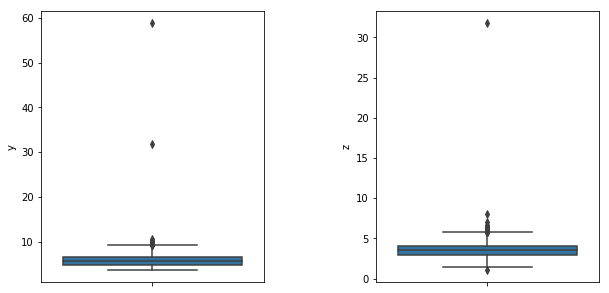

In [38]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we now that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [39]:
diamonds.loc[diamonds.z > 10] 

carat        cut  color  clarity  depth  table   price     x     y  \
48410   0.51  Very Good    5.0      4.0   61.8   54.7  1970.0  5.12  5.15   

          z  
48410  31.8

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` to the row with the outlier**

In [40]:
#your code here

In [41]:
#Solution
diamonds.loc[48410,'z'] = 0
diamonds['z'] = diamonds.apply(calculate_z, axis=1)

Let's check if we actually corrected the outlier.

In [42]:
diamonds.loc[48410]

carat           0.51
cut        Very Good
color              5
clarity            4
depth           61.8
table           54.7
price           1970
x               5.12
y               5.15
z               3.17
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here

In [47]:
#Solution
diamonds.loc[[48410]].apply(validate_z, axis=1)

48410    (Real depth: 61.8. Value to validate: 61.7, True)
dtype: object

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [48]:
#your code here

In [49]:
#Solution
diamonds[diamonds.y > 10]

carat      cut  color  clarity  depth  table    price      x  \
24067   2.00  Premium    2.0      1.0   58.9   57.0  12210.0   8.09   
25998   4.01  Premium    1.0      0.0   61.0   61.0  15223.0  10.14   
27415   5.01     Fair    0.0      0.0   65.5   59.0  18018.0  10.74   
27630   4.50     Fair    0.0      0.0   65.8   58.0  18531.0  10.23   
49189   0.51    Ideal    5.0      4.0   61.8   55.0   2075.0   5.15   

               y      z  
24067  58.904907  19.73  
25998  10.100000   6.17  
27415  10.540000   6.97  
27630  10.160000   6.71  
49189  31.807929  11.42

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#your code here

In [51]:
#Solution
def calculate_y(row):
    x = row['x']
    y = row['y']
    z = row['z']
    depth = row['depth'] / 100
    
    return  (2 * z  / depth) - x 

diamonds.loc[24067, 'y'] = 0
diamonds.loc[49189, 'y'] = 0
diamonds_with_y_zero = diamonds[diamonds.y == 0].copy()
diamonds_with_y_zero['y'] = diamonds_with_y_zero.apply(calculate_y, axis=1)
diamonds.update(diamonds_with_y_zero)

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

In [52]:
#Solution
diamonds.loc[24067]

carat            2
cut        Premium
color            2
clarity          1
depth         58.9
table           57
price        12210
x             8.09
y          58.9049
z            19.73
Name: 24067, dtype: object

In [53]:
#Solution
diamonds.loc[49189]

carat         0.51
cut          Ideal
color            5
clarity          4
depth         61.8
table           55
price         2075
x             5.15
y          31.8079
z            11.42
Name: 49189, dtype: object

In [54]:
#Solution
diamonds.loc[[49189]].apply(validate_z, axis=1)

49189    (Real depth: 61.8. Value to validate: 61.8, True)
dtype: object

In [56]:
#Solution
diamonds.loc[[24067]].apply(validate_z, axis=1)

24067    (Real depth: 58.9. Value to validate: 58.9, True)
dtype: object

In [57]:
#Solution
diamonds.loc[49189]

carat         0.51
cut          Ideal
color            5
clarity          4
depth         61.8
table           55
price         2075
x             5.15
y          31.8079
z            11.42
Name: 49189, dtype: object

In [58]:
#Solution
diamonds.loc[24067]

carat            2
cut        Premium
color            2
clarity          1
depth         58.9
table           57
price        12210
x             8.09
y          58.9049
z            19.73
Name: 24067, dtype: object

#### Solution

Although our formula was applied correctly, we can clearly see that the values we got for `y` are outliers, since the max value for `y` is around 10. Since we could not correctly approximate `y` (and this can only mean that the values of `x`, `y` or `depth` are wrong), we will drop these 2 rows.

In [59]:
#Solution
diamonds = diamonds.drop([24067, 49189])

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

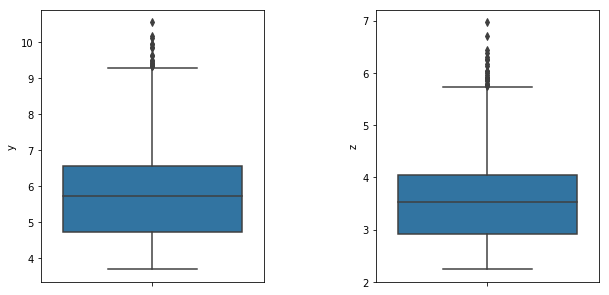

In [60]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think?**


In [61]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to another notebook to have a more organized way of working. Your new csv will be named ``diamonds_clean``**

In [62]:
#your code here

In [63]:
#Solution
diamonds.to_csv("diamonds_clean.csv", index=False)